# Fit the basis elements to Martin Hairer regularity structures

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
from scipy import integrate

/mnt/sw/nix/store/71ksmx7k6xy3v9ksfkv5mp5kxxp64pd6-python-3.10.13-view/lib/python3.10/site-packages/numpy/core/getlimits.py:549: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/mnt/sw/nix/store/71ksmx7k6xy3v9ksfkv5mp5kxxp64pd6-python-3.10.13-view/lib/python3.10/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)
/mnt/sw/nix/store/71ksmx7k6xy3v9ksfkv5mp5kxxp64pd6-python-3.10.13-view/lib/python3.10/site-packages/numpy/core/getlimits.py:549: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/mnt/sw/nix/store/71ksmx7k6xy3v9ksfkv5mp5kxxp64pd6-python-3.10.13-view/lib/python3.10/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <

In [2]:
data = np.load('../data_latent.npy')
print(data.shape)

nu_slice = 0

H = data[:,:,nu_slice,3::]
xx =  data[:,:,nu_slice,0]
tt =  data[:,:,nu_slice,1]
nunu =  data[:,:,nu_slice,2]

print(nunu)

noise = np.loadtxt('noise.txt')

(101, 101, 5, 13)
[[0.1 0.1 0.1 ... 0.1 0.1 0.1]
 [0.1 0.1 0.1 ... 0.1 0.1 0.1]
 [0.1 0.1 0.1 ... 0.1 0.1 0.1]
 ...
 [0.1 0.1 0.1 ... 0.1 0.1 0.1]
 [0.1 0.1 0.1 ... 0.1 0.1 0.1]
 [0.1 0.1 0.1 ... 0.1 0.1 0.1]]


In [3]:
%matplotlib widget
from ipywidgets import interact, IntSlider

# Function to update the plot based on the slider value
def update_plot(dim):
    fig = plt.figure()
    global ax  # Declare ax as global to avoid redefinition in subsequent calls
    ax1 = fig.add_subplot(111, projection='3d')
    ax1.plot_surface(tt, xx, H[:, :, dim], cmap='rainbow')
    ax1.set_xlabel('tt')
    ax1.set_ylabel('xx')
    ax1.set_zlabel('H')
    plt.show()

# Create a slider for the third dimension
slider = IntSlider(value=0, min=0, max=H.shape[2]-1, step=1, description='Dimension:')
interact(update_plot, dim=slider)

interactive(children=(IntSlider(value=0, description='Dimension:', max=9), Output()), _dom_classes=('widget-in…

<function __main__.update_plot(dim)>

In [4]:
def heat_kernel(x,y,t):
    return 1/np.sqrt(4*np.pi*t*nunu[0,0]) * np.exp(-((x - y)**2/(4*nunu[0,0]*t)))
def init_sines(x):
    return np.sin(x * np.pi / 5) + 0.2 * np.cos(x * np.pi / 5 * 1 / 2) + 2 * np.sin(x * np.pi / 5 * 2)
def init_sines(x):
    return 0.0

In [5]:
basis_elements = np.ones([101,101,9])

# 0: index for space
# 1: index for time

for i in range(tt.shape[0]):
    for j in range(tt.shape[1]):
        y = xx[i,::]
        if j >= 0:
            basis_elements[i,j,0] = integrate.trapezoid(heat_kernel(xx[i,j],y,tt[i,j])*init_sines(y), y)  # This is c

for i in range(len(xx)):
    for j in range(len(tt)):
        y = xx[j,::]
        if j >= 0:
            basis_elements[i,j,1] = integrate.trapezoid(heat_kernel(xx[i,j],y,tt[i,j])*basis_elements[i,::,0], y)  # This is I[c]
            basis_elements[i,j,2] = integrate.trapezoid(heat_kernel(xx[i,j],y,tt[i,j])*noise[i,::], y)  # This is I[noise]
            basis_elements[i,j,3] = integrate.trapezoid(heat_kernel(xx[i,j],y,tt[i,j])*np.gradient(basis_elements[i,::,0], y), y)  # This is I[Dx c]
            basis_elements[i,j,4] = integrate.trapezoid(heat_kernel(xx[i,j],y,tt[i,j])*noise[i,::]*basis_elements[i,::,0], y)  # This is I[c xi]
            basis_elements[i,j,5] = integrate.trapezoid(heat_kernel(xx[i,j],y,tt[i,j])*noise[i,::]*np.gradient(basis_elements[i,::,0], y), y)  # This is I[Dxc xi]
            basis_elements[i,j,6] = integrate.trapezoid(heat_kernel(xx[i,j],y,tt[i,j])*basis_elements[i,::,0]**2, y)  # This is I[c^2]
            basis_elements[i,j,7] = integrate.trapezoid(heat_kernel(xx[i,j],y,tt[i,j])*np.gradient(basis_elements[i,::,0], y)**2, y)  # This is I[Dxc ^2]
            basis_elements[i,j,8] = integrate.trapezoid(heat_kernel(xx[i,j],y,tt[i,j])*np.gradient(basis_elements[i,::,0], y)*basis_elements[i,::,0], y)  # This is I[c Dxc]


/tmp/ipykernel_887497/545054164.py:2: RuntimeWarning: divide by zero encountered in scalar divide
  return 1/np.sqrt(4*np.pi*t*nunu[0,0]) * np.exp(-((x - y)**2/(4*nunu[0,0]*t)))
/tmp/ipykernel_887497/545054164.py:2: RuntimeWarning: divide by zero encountered in divide
  return 1/np.sqrt(4*np.pi*t*nunu[0,0]) * np.exp(-((x - y)**2/(4*nunu[0,0]*t)))
/tmp/ipykernel_887497/545054164.py:2: RuntimeWarning: invalid value encountered in divide
  return 1/np.sqrt(4*np.pi*t*nunu[0,0]) * np.exp(-((x - y)**2/(4*nunu[0,0]*t)))
/tmp/ipykernel_887497/545054164.py:2: RuntimeWarning: invalid value encountered in multiply
  return 1/np.sqrt(4*np.pi*t*nunu[0,0]) * np.exp(-((x - y)**2/(4*nunu[0,0]*t)))


In [6]:
basis_elements = np.ones([101,101,7])

for i in range(len(xx)):
    for j in range(len(tt)):
        y = xx[j,::]
        if j >= 0:
            basis_elements[i,j,0] = integrate.trapezoid(heat_kernel(xx[i,j],y,tt[i,j])*noise[i,::], y)  # This is I[noise]
            basis_elements[i,j,1] =  integrate.trapezoid(heat_kernel(xx[i,j],y,tt[i,j])*np.gradient(basis_elements[i,::,0], y), y) # I[Dx I[noise]]
            basis_elements[i,j,2] = integrate.trapezoid(heat_kernel(xx[i,j],y,tt[i,j])*basis_elements[i,::,0], y) # I[I[noise]]
            basis_elements[i,j,3] = integrate.trapezoid(heat_kernel(xx[i,j],y,tt[i,j])*np.gradient(basis_elements[i,::,1]), y) # I[Dx I[Dx I[noise]]]
            basis_elements[i,j,4] = integrate.trapezoid(heat_kernel(xx[i,j],y,tt[i,j])*basis_elements[i,::,1], y) # I[I[Dx I[noise]]]
            basis_elements[i,j,5] = integrate.trapezoid(heat_kernel(xx[i,j],y,tt[i,j])*np.gradient(basis_elements[i,::,2]), y) # I[Dx I[I[noise]]]
            basis_elements[i,j,6] = integrate.trapezoid(heat_kernel(xx[i,j],y,tt[i,j])*basis_elements[i,::,2], y) # I[I[I[noise]]]

/tmp/ipykernel_887497/545054164.py:2: RuntimeWarning: divide by zero encountered in scalar divide
  return 1/np.sqrt(4*np.pi*t*nunu[0,0]) * np.exp(-((x - y)**2/(4*nunu[0,0]*t)))
/tmp/ipykernel_887497/545054164.py:2: RuntimeWarning: divide by zero encountered in divide
  return 1/np.sqrt(4*np.pi*t*nunu[0,0]) * np.exp(-((x - y)**2/(4*nunu[0,0]*t)))
/tmp/ipykernel_887497/545054164.py:2: RuntimeWarning: invalid value encountered in divide
  return 1/np.sqrt(4*np.pi*t*nunu[0,0]) * np.exp(-((x - y)**2/(4*nunu[0,0]*t)))
/tmp/ipykernel_887497/545054164.py:2: RuntimeWarning: invalid value encountered in multiply
  return 1/np.sqrt(4*np.pi*t*nunu[0,0]) * np.exp(-((x - y)**2/(4*nunu[0,0]*t)))


In [7]:
%matplotlib widget
import ipywidgets as widgets
from ipywidgets import interact

# Function to update the plot based on the slider value

def update_plot(dim):
    fig = plt.figure()
    ax2 = fig.add_subplot(111,projection = '3d')
    #ax.clear()
    print(basis_elements[:, 1::, dim])
    ax2.plot_surface(xx[::,1::], tt[::,1::], basis_elements[:, 1::, dim], cmap='rainbow')
    ax2.set_xlabel('x')
    ax2.set_ylabel('t')
    ax2.set_zlabel('Basis Element')
    #fig.savefig('Plots/KPZ_D1em1_sine_condition/reg_structure_'+str(dim)+'.pdf')
    plt.draw()
    plt.show()

# Create a slider for the third dimension
slider = widgets.IntSlider(value=4, min=0, max=basis_elements.shape[2]-1, step=1, description='Dimension:')
interact(update_plot, dim=slider)


interactive(children=(IntSlider(value=4, description='Dimension:', max=6), Output()), _dom_classes=('widget-in…

<function __main__.update_plot(dim)>

In [8]:
print(np.reshape(basis_elements,(-1,7)).shape)

(10201, 7)


[-0.22055261 -0.28111871  0.02350643  0.20835099  0.23503514  2.98485965
 -0.68079068]
[0.02149933]
0.17510627054030878


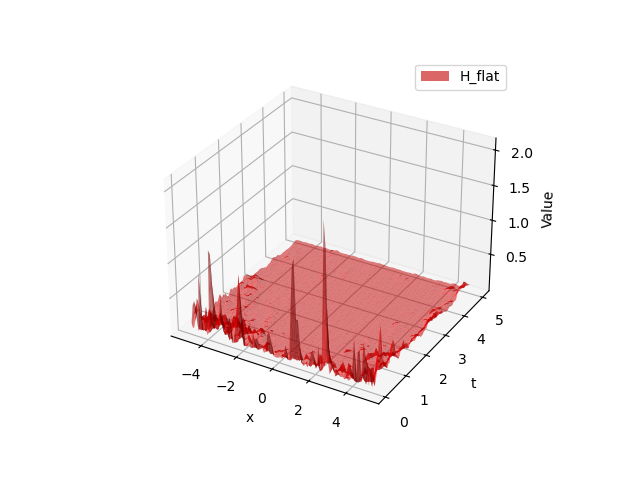

[ 0.15514347  0.28610744  0.30799046 -0.54882279 -0.68285284  0.64223761
  0.07884923]
[0.02179328]
0.14771568220425688


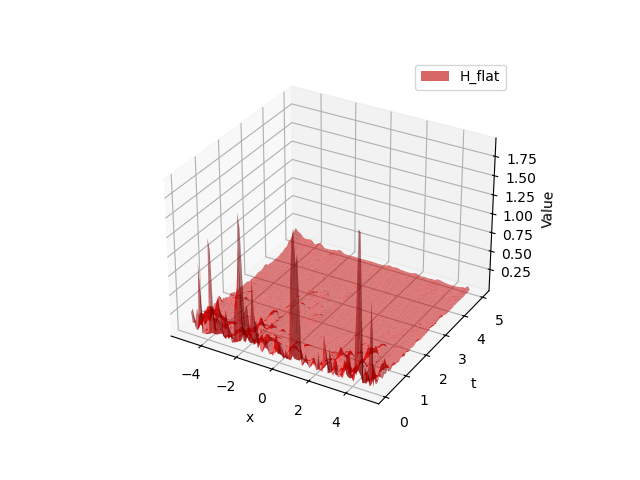

[ 0.07170678 -0.21458025  0.06831056 -0.02208925  0.3994361   0.1099682
 -0.62095511]
[0.0144037]
0.11258257503618153


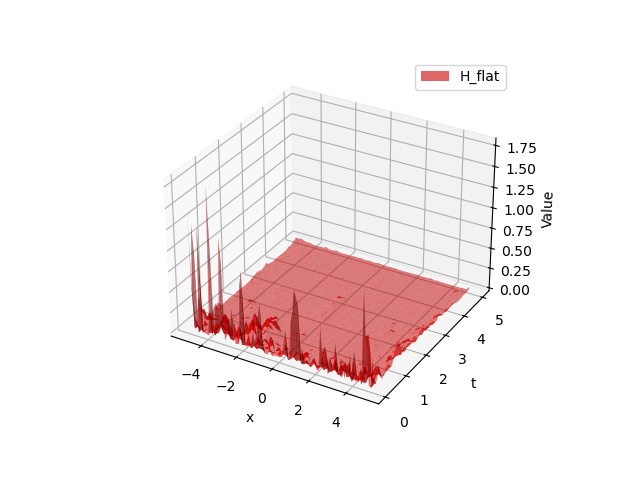

[-0.24059867 -0.35560929 -0.30933909  0.25027282  0.61860166 -0.45589924
 -0.26702429]
[0.01620731]
0.11668333257608929


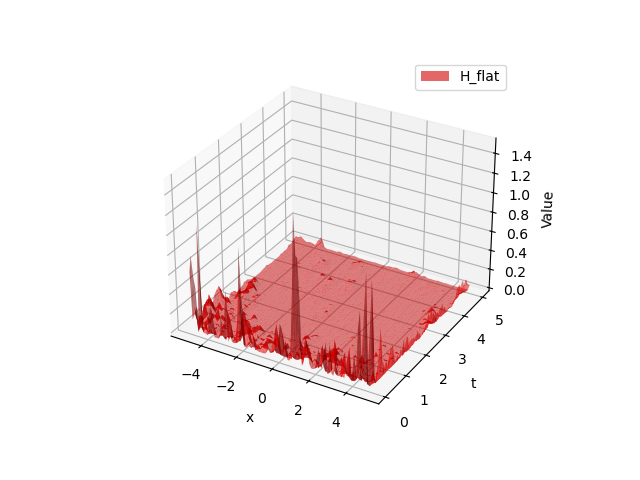

[ 0.31753245 -0.11998587 -0.36641339 -0.2023553   0.17464253  1.09242783
 -0.3045344 ]
[0.0208664]
0.15158729668988352


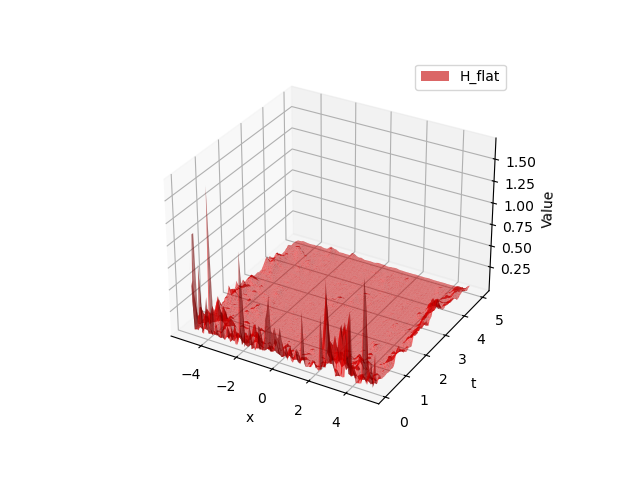

[-0.51367623 -0.28023386  1.03772131  0.50222154  0.27969959  2.23856383
 -1.4391112 ]
[0.01496505]
0.18619169024520352


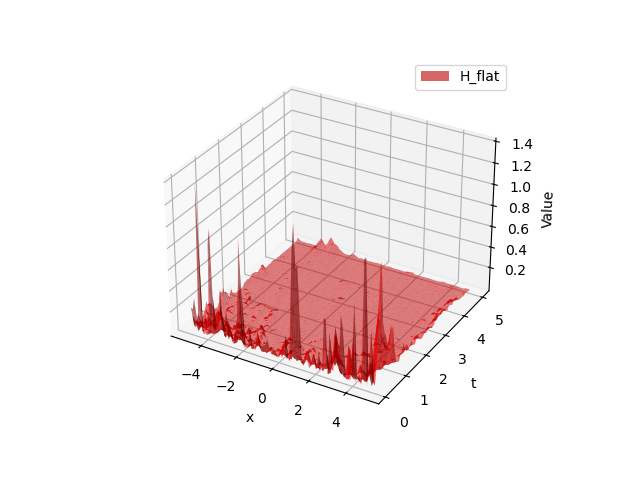

[-0.12057906  0.15623397  0.10649379  0.44370654  0.06935015 -0.36545814
 -0.02020032]
[0.01747573]
0.07919619550969753


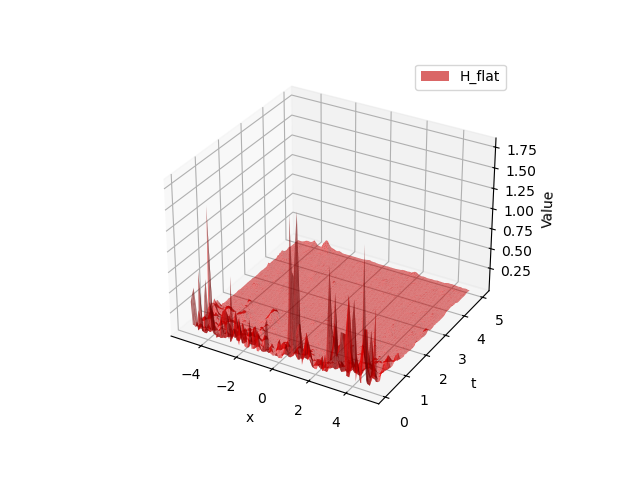

[-0.4290714  -0.15223163  0.8148391   0.33734624  0.20283048  2.20114429
 -1.10196477]
[0.01494963]
0.11270354032964539


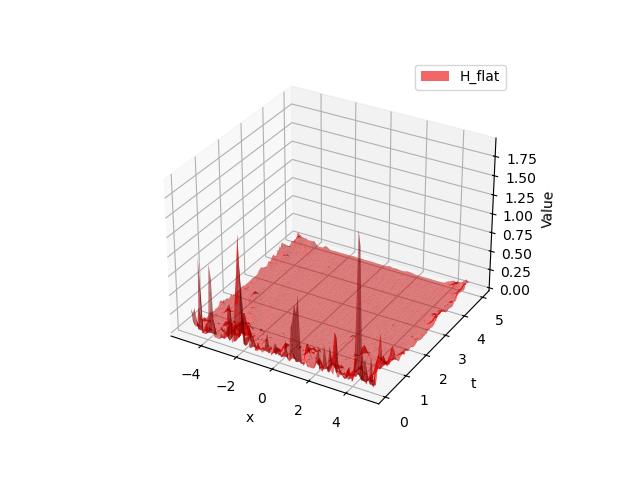

[-0.1530221  -0.10467089 -0.20106627  0.43097816  0.31320833 -1.10638251
  0.17137814]
[0.01700942]
0.08973545380254172


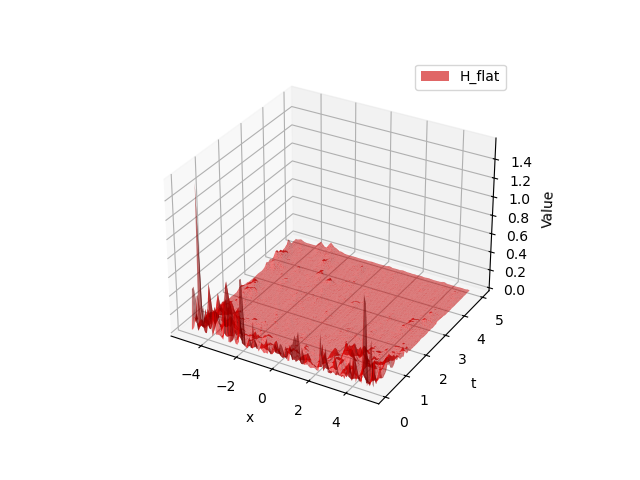

[-0.28621245  0.0808347   0.6642075   0.1089947   0.02237259 -0.00287464
 -0.80660186]
[0.02323876]
0.13556665575017185


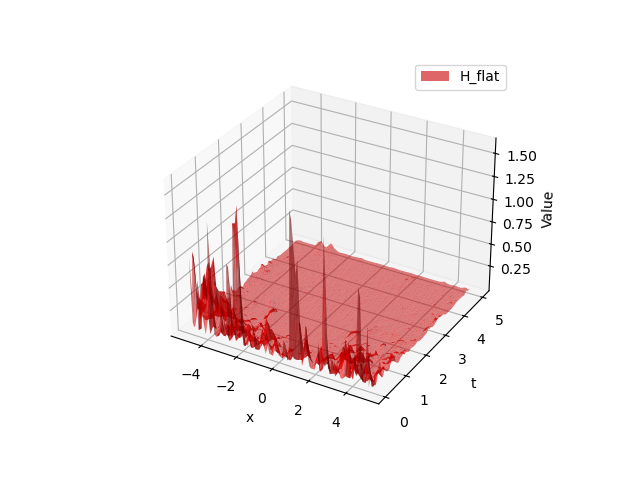

In [9]:
# Compute the coefficients of the fit
#%matplotlib inline
import numpy as np
coefficients = []
rel_residuals = []
for i in range(len(H[0,0,::])):
    # Flatten the grid and f for vectorized linear algebra
    t_flat = tt[1::,::].ravel()  # shape (10201,)
    x_flat = xx[1::,::].ravel()
    H_flat = H[1::,::,i].ravel()

    # Construct design matrix A where A[:, i] = phi_i(x, y)
    A = np.reshape(basis_elements[1::,::,::],(-1,7))  # shape (10201, n_basis)

    # Solve least squares: A @ c ≈ f_flat
    c, residuals, rank, s = np.linalg.lstsq(A, H_flat, rcond=None)
    print(c)
    print(residuals/t_flat.shape)
    # Now you can reconstruct the fit
    f_fit_flat = A @ c
    f_fit = f_fit_flat.reshape(xx[1::,::].shape)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    print(np.mean(abs(f_fit_flat-H_flat)/abs(H_flat+1)))
    rel_residuals.append(np.mean(abs(f_fit_flat-H_flat)/abs(H_flat+1)))
    #ax.plot_trisurf(x_flat, t_flat, f_fit_flat, color='blue', alpha=0.6, label='f_fit')
    #ax.plot_trisurf(x_flat, t_flat, H_flat, color='red', alpha=0.6, label='H_flat')
    ax.plot_trisurf(x_flat, t_flat, (f_fit_flat-H_flat)**2, color='red', alpha=0.6, label='H_flat')
    ax.set_xlabel('x')
    ax.set_ylabel('t')
    ax.set_zlabel('Value')
    plt.legend()
    #fig.savefig('Plots/KPZ_D1em1_sine_condition/fit_residual_'+str(i)+'.pdf')
    plt.show()
    coefficients.append(c)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


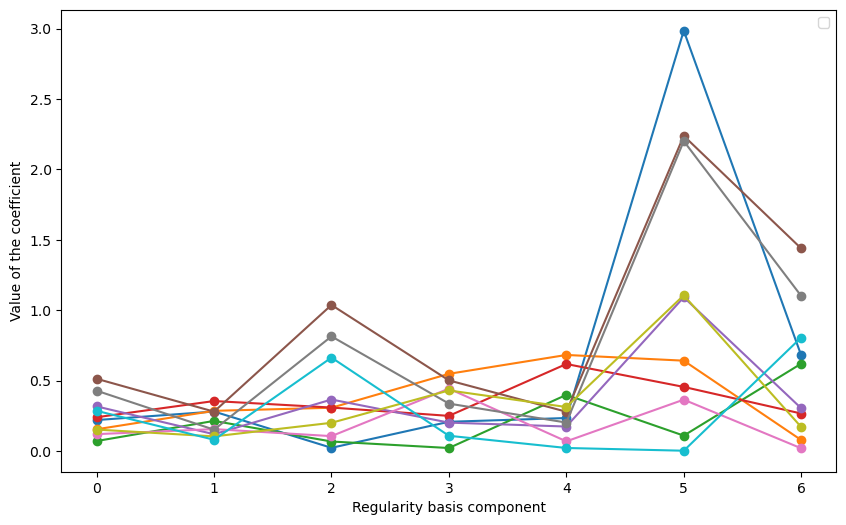

In [13]:
%matplotlib inline
from collections import defaultdict
from fractions import Fraction

# After the loop, plot all coefficient
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

for i in range(len(coefficients)):
    ax.plot(range(len(coefficients[0])), abs(coefficients[i]), marker='o')#, label=f'$H_{i}$')

# Draw vertical rectangles for regularity values
# Group indices by regularity value
# regularity_values = [1/2, 3/2, 5/2, 5/2, 7/2, 7/2, 9/2]
# reg_to_indices = defaultdict(list)
# for idx, reg in enumerate(regularity_values):
#     reg_to_indices[reg].append(idx)

# colors = plt.cm.Pastel1.colors  # Use a colormap for distinct colors
# for color_idx, (reg, indices) in enumerate(reg_to_indices.items()):
#     # Find the min and max index for this regularity group
#     min_idx = min(indices)
#     max_idx = max(indices)
#     # Draw a rectangle spanning all indices with the same regularity
#     reg_frac = Fraction(reg).limit_denominator()
#     rect = plt.Rectangle((min_idx-0.4, ax.get_ylim()[0]), 
#                          max_idx-min_idx+0.8, 
#                          ax.get_ylim()[1]-ax.get_ylim()[0],
#                          color=colors[color_idx % len(colors)], 
#                          alpha=0.3, 
#                          label=f'Regularity {reg_frac}')
#     ax.add_patch(rect)


ax.set_ylabel('Value of the coefficient')
ax.set_xlabel('Regularity basis component')


ax.legend()
plt.savefig('Regularity_fit.pdf')
plt.show()


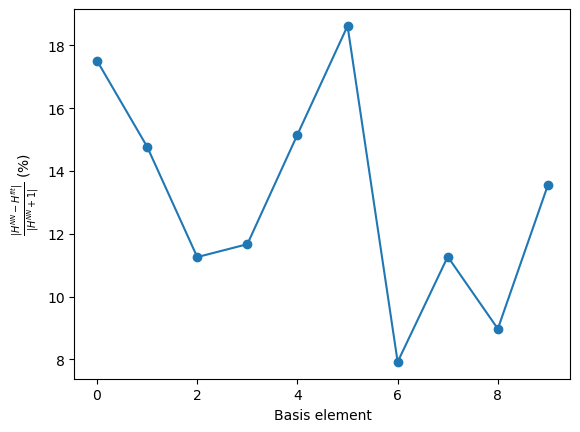

In [14]:
plt.plot(np.array(rel_residuals)*100,marker = 'o')
plt.xlabel('Basis element')
plt.ylabel('$\\frac{|H^{NN}-H^{fit}|}{|H^{NN}+1|}$ (%)')
plt.savefig('Relative_error_fit.pdf')
plt.show()